In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import urllib
import sys
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
import urllib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import geopandas as gpd
import pyogrio

# To ignore some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
gdf = pyogrio.read_dataframe('tl_2023_36_tract/tl_2023_36_tract.shx')

### Population Data by census tract

In [3]:
Cenpop = gpd.read_file('nyc_decennialcensusdata_2010_2020_change-core-geographies.csv')

In [4]:
Cenpop['GeoID'] = Cenpop['GeoID'].astype(str)

In [5]:
Cenpop = pd.merge(Cenpop, gdf[['GEOID', 'geometry']], left_on='GeoID', right_on='GEOID', how='left')

In [23]:
Cenpop.head()

,Year,GeoType,Borough,GeoID,BCT2020,Name,CDType,NTAType,Pop1,Pop1P,...,Pop70t74P,Pop75t79,Pop75t79P,Pop80t84,Pop80t84P,Pop85pl,Pop85plP,geometry_x,GEOID,geometry_y
0,2020,CT2020,Bronx,36005000100,2000100,,,,"3,772",100.0,...,0.2,4,0.1,6,0.2,1,0.0,None,36005000100,"POLYGON ((-73.89772 40.79514, -73.89611 40.796..."
1,2020,CT2020,Bronx,36005000200,2000200,,,,"4,779",100.0,...,2.8,108,2.3,61,1.3,96,2.0,None,36005000200,"POLYGON ((-73.86648 40.80590, -73.86231 40.809..."
2,2020,CT2020,Bronx,36005000400,2000400,,,,"6,272",100.0,...,4.0,105,1.7,69,1.1,64,1.0,None,36005000400,"POLYGON ((-73.85960 40.81528, -73.85870 40.815..."
3,2020,CT2020,Bronx,36005001600,2001600,,,,"5,795",100.0,...,4.2,171,3.0,131,2.3,143,2.5,None,36005001600,"POLYGON ((-73.86246 40.81925, -73.86153 40.819..."
4,2020,CT2020,Bronx,36005001901,2001901,,,,"2,292",100.0,...,0.7,16,0.7,9,0.4,6,0.3,None,36005001901,"POLYGON ((-73.93180 40.80788, -73.93094 40.808..."


### Legally opperating businesses in NYC

In [7]:
legal_opperate = pd.read_csv('https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?date=20231207&accessType=DOWNLOAD')

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_3997/1129729009.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  legal_opperate = pd.read_csv('https://data.cityofnewyork.us/api/views/w7w3-xahh/rows.csv?date=20231207&accessType=DOWNLOAD')


In [8]:
legal_opperate.head()

,DCA License Number,License Type,License Expiration Date,License Status,License Creation Date,Industry,Business Name,Business Name 2,Address Building,Address Street Name,...,Community Board,Council District,BIN,BBL,NTA,Census Tract,Detail,Longitude,Latitude,Location
0,0967332-DCA,Business,02/28/2017,Inactive,02/04/2010,Home Improvement Contractor,"BARBARINO, JOHN JR.",JOHN BARBARINO JR_HOME IMPROVEMENT,239,MEDFORD CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2103411-DCA,Individual,03/31/2024,Active,01/11/2022,Sightseeing Guide,"Nieciak, Joseph",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2060087-DCA,Individual,03/31/2024,Active,10/31/2017,Sightseeing Guide,"Arcaro, Tyler",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2078026-DCA,Individual,03/31/2024,Active,09/11/2018,Sightseeing Guide,"HESSE, DAPHNEE",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2057801-DCA,Individual,02/28/2019,Inactive,09/01/2017,Home Improvement Salesperson,"ESCOBAR, KEVIN",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281408,1338237-DCA,Business,11/01/2020,Inactive,09/24/2012,Pedicab Business,KADIR YALCIN,NaN,1525,W 7TH ST,...,311.0,44.0,3174380,3066000082,BK29,432.0,"Active Sticker Numbers: 2253, 1835, 1833, 225...",-73.981013,40.609702,"(40.60970247723455, -73.98101250216288)"
281409,2059837-DCA,Business,10/28/2017,Inactive,10/25/2017,Amusement Device Temporary,MCDANIEL BROTHERS SHOWS INC.,NaN,150,THROGGS NECK BLVD,...,210.0,13.0,2078680,2055030001,BX52,118.0,"Device Name(s): JUNGLE OF FUN, SLIDE",-73.811670,40.815380,"(40.815379813422666, -73.81166957137239)"
281410,2052571-DCA,Business,06/04/2017,Inactive,05/05/2017,Amusement Device Temporary,"ALL COUNTY AMUSEMENTS, INC.",NaN,4514,245TH ST,...,411.0,19.0,4170261,4081940003,QN45,150701.0,"Device Name(s): GO GATOR, BOATS, HI ROLLER, S...",-73.741170,40.765421,"(40.76542052996765, -73.7411702386112)"
281411,1363538-DCA,Business,12/31/2014,Inactive,07/22/2010,Electronics Store,NYCITY WIRELESS CENTER INC.,NaN,7005,13TH AVE,...,310.0,43.0,3157056,3061670008,NaN,NaN,NaN,-74.004571,40.623038,"(40.62303815836191, -74.00457131046527)"


### License application in NYC

In [9]:
license_appli = pd.read_csv('https://data.cityofnewyork.us/api/views/ptev-4hud/rows.csv?date=20231207&accessType=DOWNLOAD')

/var/folders/qp/9y56mfxx3zq2c_cjbvf9xg_w0000gn/T/ipykernel_3997/2915713197.py:1: DtypeWarning: Columns (20,24) have mixed types. Specify dtype option on import or set low_memory=False.
  license_appli = pd.read_csv('https://data.cityofnewyork.us/api/views/ptev-4hud/rows.csv?date=20231207&accessType=DOWNLOAD')


In [10]:
license_appli.head()

,Application ID,License Number,License Type,Application or Renewal,Business Name,Status,Start Date,End Date,Temp Op Letter Issued,Temp Op Letter Expiration,...,Unit Type,Unit,Description,City,State,Zip,Contact Phone,Longitude,Latitude,Active Vehicles
0,1066-2017-RHIC,1294131-DCA,Business,Renewal,PEYKO TZENOV,Issued,01/09/2017,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BRONX,NY,10467,9178047161,-73.877091,40.876214,NaN
1,7066-2014-ASLS,2009515-DCA,Business,Application,7TH AVE GOURMET INC.,Issued,06/02/2014,06/13/2014,NaN,NaN,...,NaN,NaN,NaN,NEW YORK,NY,10011,718-783-3806,-73.975088,40.674997,NaN
2,1164-2019-RDPD,1472251-DCA,Business,Renewal,AMERICAN EAST PHARMACY INC.,Issued,01/09/2019,01/10/2019,NaN,NaN,...,NaN,NaN,NaN,NEW YORK,NY,10002,2129251900,-73.996169,40.714118,NaN
3,33701-2016-RELE,2025971-DCA,Business,Renewal,LUCAS ELECTRONICS INC,Issued,12/31/2016,01/10/2017,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11222,347-987-3235,-73.954098,40.729869,NaN
4,34278-2018-RELE,2047043-DCA,Business,Renewal,ELITE WIRELESS GROUP NY LLC,Issued,12/31/2018,01/08/2019,NaN,NaN,...,NaN,NaN,NaN,BROOKLYN,NY,11226,718-484-7746,-73.949327,40.650826,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467894,15392-2023-RSHG,2003798-DCA,Business,Renewal,T-MOBILE NORTHEAST LLC,Pending,06/29/2023,NaN,NaN,NaN,...,NaN,NaN,NaN,NEW YORK,NY,10019,2128642763,-73.979419,40.765265,NaN
467895,15048-2023-RSHG,1401842-DCA,Business,Renewal,FORDHAM PAWNBROKER INC.,Issued,06/22/2023,06/24/2023,NaN,NaN,...,NaN,NaN,NaN,BRONX,NY,10468,7185617683,-73.901611,40.862058,NaN
467896,15143-2023-RSHG,1077678-DCA,Business,Renewal,"MASTER NO. ONE AUTO GLASS, INC.",Issued,06/26/2023,06/28/2023,NaN,NaN,...,NaN,NaN,NaN,BRONX,NY,10474,7185890919,-73.890254,40.818890,NaN
467897,15243-2023-RSHG,1299644-DCA,Business,Renewal,"SIMON & SONS JEWELRY, LLC",Issued,06/28/2023,06/29/2023,NaN,NaN,...,NaN,NaN,NaN,REGO PARK,NY,11374,3476800568,-73.863166,40.728823,NaN


### NYC subway station data:

In [11]:
Stations = pd.read_csv( 'https://raw.githubusercontent.com/CUSP2021ADS/Data/main/NYCSubwayNodes.csv' , index_col=None, header=0 )

In [12]:
Stations

,name,id,boro,lat,long,lines
0,Greenpoint Av,G26,Bk,40.731352,-73.954449,G
1,21 St,G24,Q,40.744065,-73.949724,G
2,Court Sq,G22,Q,40.746554,-73.943832,G
3,36 St,G20,Q,40.752039,-73.928781,M R
4,Queens Plaza,G21,Q,40.748973,-73.937243,E M R
...,...,...,...,...,...,...
493,City Hall,R24,M,40.713282,-74.006978,R W
494,Canal St,R23,M,40.719527,-74.001775,R W
495,Prince St,R22,M,40.724329,-73.997702,R W
496,8 St - NYU,R21,M,40.730328,-73.992629,R W


### NYC Bus Station data

In [13]:
bus_data = pd.read_csv('https://data.cityofnewyork.us/api/views/t4f2-8md7/rows.csv?accessType=DOWNLOAD')

In [14]:
bus_data

,the_geom,BoroCode,BoroName,BoroCD,CounDist,AssemDist,StSenDist,CongDist,Shelter_ID,Corner,On_Street,Cross_Stre,Longitude,Latitude,NTAName,FEMAFldz,FEMAFldT,HrcEvac
0,POINT (-73.94874357365637 40.64085475597672),3,Brooklyn,317,45,42,21,9,BR02218,SW,AV D,NOSTRAND AV,-73.948745,40.640863,East Flatbush-Erasmus,X,AREA OF MINIMAL FLOOD HAZARD,5.0
1,POINT (-74.02283555116742 40.6292447605423),3,Brooklyn,310,43,46,26,11,BR02219,SW,5 AV,BAY RIDGE PKWY,-74.022837,40.629253,Bay Ridge,X,AREA OF MINIMAL FLOOD HAZARD,NaN
2,POINT (-73.92467258003798 40.67375874807616),3,Brooklyn,308,41,55,20,9,BR02220,SE,ST MARKS AV,BUFFALO AV,-73.924674,40.673767,Crown Heights (North),X,AREA OF MINIMAL FLOOD HAZARD,NaN
3,POINT (-73.9401345806071 40.578033768126936),3,Brooklyn,315,48,45,23,8,BR02221,SW,ORIENTAL BLVD,MACKENZIE ST,-73.940136,40.578042,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1.0
4,POINT (-73.93991658060635 40.57805676808165),3,Brooklyn,315,48,45,23,8,BR02222,SW,ORIENTAL BLVD,MACKENZIE ST,-73.939918,40.578065,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3325,POINT (-74.11221352595592 40.5678197761412),5,Staten Island,502,50,64,24,11,SI05219,NE,Hylan Blvd,Beach Av,-74.112215,40.567828,New Dorp-Midland Beach,X,AREA OF MINIMAL FLOOD HAZARD,4.0
3326,POINT (-74.16856250790204 40.57400177692753),5,Staten Island,502,51,63,24,11,SI05220,NW,Independence Av,Pathmark,-74.168564,40.574010,New Springville-Willowbrook-Bulls Head-Travis,X,AREA OF MINIMAL FLOOD HAZARD,3.0
3327,POINT (-74.09298952767594 40.64534875958313),5,Staten Island,501,49,61,23,11,SI05221,SW,Richmond Terrace,Franklin Av,-74.092991,40.645357,St. George-New Brighton,X,AREA OF MINIMAL FLOOD HAZARD,NaN
3328,POINT (-74.12038852436673 40.56029177738492),5,Staten Island,503,50,64,24,11,SI05222,SW,HYLAN BLVD,GUYON AV,-74.120390,40.560300,Oakwood-Richmondtown,X,0.2 PCT ANNUAL CHANCE FLOOD HAZARD,2.0


### NYC parking lot 

In [15]:
parking_data = pd.read_csv('DOITT_PARKING_LOT_20240420.csv')

In [16]:
parking_data

,the_geom,SOURCE_ID,FEAT_CODE,SUB_CODE,STATUS,SHAPE_Leng,SHAPE_Area
0,MULTIPOLYGON (((-73.97910559725612 40.69049642...,21500000001,5000,500000,Unchanged,778.318836,32676.073685
1,MULTIPOLYGON (((-73.97943374194773 40.69316130...,21500000002,5000,500000,Updated,3737.772791,108080.622252
2,MULTIPOLYGON (((-73.9832399249372 40.702812757...,21500000003,5000,500000,Unchanged,442.772495,5407.860486
3,MULTIPOLYGON (((-73.98189157977659 40.70310347...,21500000004,5000,500000,Unchanged,284.623893,4027.729151
4,MULTIPOLYGON (((-73.98594989444811 40.70232449...,21500000005,5000,500000,Unchanged,1567.687419,122903.007235
...,...,...,...,...,...,...,...
20709,MULTIPOLYGON (((-73.90509532737212 40.65704739...,20500001583,5000,500000,Updated,428.555924,9729.869396
20710,MULTIPOLYGON (((-73.92782996934407 40.63042129...,20500001584,5000,500000,Updated,225.896716,2397.672264
20711,MULTIPOLYGON (((-73.83727604678778 40.67997471...,5500000415,5000,500000,New,363.445438,2980.213577
20712,MULTIPOLYGON (((-73.83764535116832 40.58147592...,1500000505,5000,500000,Updated,332.926316,5687.420775


### Median income by census tract

In [17]:
median_income = pd.read_csv('censustract-medianhouseholdincome2022.csv')

In [18]:
median_income['Census Tract'] = median_income['Census Tract'].astype(str)

In [19]:
med_income = pd.merge(median_income, gdf[['GEOID', 'geometry']], left_on='Census Tract', right_on='GEOID', how='left')

In [20]:
gpd_med_income = gpd.GeoDataFrame(med_income, geometry='geometry')

#### Median Income w/ geometry

In [21]:
gpd_med_income

,short_name,long_name,Census Tract,2009-2013,2014-2018,GEOID,geometry
0,hh_inc_med_adj,Median household income (2022$),36005041900,43887.524204,36984.666450,36005041900,"POLYGON ((-73.88527 40.87923, -73.88466 40.879..."
1,hh_inc_med_adj,Median household income (2022$),36005042000,36089.108199,42552.994051,36005042000,"POLYGON ((-73.86229 40.89261, -73.86220 40.892..."
2,hh_inc_med_adj,Median household income (2022$),36005042100,61363.318016,39472.449695,36005042100,"POLYGON ((-73.88705 40.88436, -73.88686 40.884..."
3,hh_inc_med_adj,Median household income (2022$),36005042200,61962.267279,52862.277148,36005042200,"POLYGON ((-73.85852 40.89134, -73.85813 40.892..."
4,hh_inc_med_adj,Median household income (2022$),36005042300,40694.738215,42457.789589,36005042300,"POLYGON ((-73.87977 40.87712, -73.87972 40.877..."
...,...,...,...,...,...,...,...
2105,hh_inc_med_adj,Median household income (2022$),36085030301,78869.300802,86863.870476,36085030301,"POLYGON ((-74.16848 40.62156, -74.16814 40.622..."
2106,hh_inc_med_adj,Median household income (2022$),36085030302,91844.522230,90517.908373,36085030302,"POLYGON ((-74.16814 40.62208, -74.16793 40.622..."
2107,hh_inc_med_adj,Median household income (2022$),36085031901,33070.210705,11264.727870,36085031901,"POLYGON ((-74.16647 40.62852, -74.16645 40.629..."
2108,hh_inc_med_adj,Median household income (2022$),36085031902,42717.399536,42501.991661,36085031902,"POLYGON ((-74.17129 40.64052, -74.17118 40.641..."


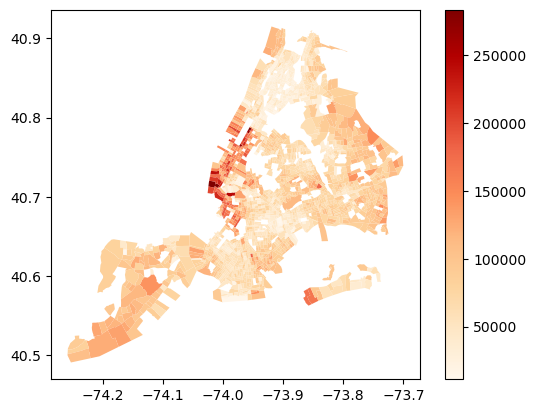

In [22]:
ax = gpd_med_income.plot(column='2014-2018', cmap='OrRd', legend=True)

# Show the plot
plt.show()